In [45]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [46]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [47]:
def transform_sex(valor):
    if valor == 'female':
        return 1
    else:
        return 0

In [48]:
train['Sex_binario'] = train['Sex'].map(transform_sex) # transforma em valor numérico o sexo do conjunto de treino
test['Sex_binario'] = test['Sex'].map(transform_sex)

var = ['Sex_binario', 'Age'] # variáveis que serão utilizadas para predição

X = train[var].fillna(-1) # variáveis que serão utilizadas para treinar o modelo
y = train['Survived'] # variável que a gente quer prever

In [49]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_binario
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [50]:
np.random.seed(1)
X_treino, X_valid, y_treino, y_valid = train_test_split(X, y, test_size=0.5)

In [51]:
model = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=0)
model.fit(X_treino, y_treino) # treinando o modelo

RandomForestClassifier(n_jobs=-1, random_state=0)

In [52]:
p = model.predict(X_valid)

In [53]:
np.mean(y_valid == p) # pontuação pior que se considerar só o gênero

0.7466367713004485

# Validação cruzada ou K-Fold

In [54]:
from sklearn.model_selection import RepeatedKFold

In [55]:
resultados = []
kf = RepeatedKFold(n_splits=2,n_repeats=10, random_state=10)

for rep in range(10):
    print("Rep:", rep)
    kf = KFold(5, shuffle=True, random_state=rep)

    for linhas_treino, linhas_valid in kf.split(X):
        print("Treino:", linhas_treino.shape[0])
        print("Valid:", linhas_valid.shape[0])

        X_treino, X_valid = X.iloc[linhas_treino], X.iloc[linhas_valid]
        y_treino, y_valid = y.iloc[linhas_treino], y.iloc[linhas_valid]

        modelo = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=0)
        modelo.fit(X_treino, y_treino)

        p = modelo.predict(X_valid)

        acc = np.mean(y_valid == p)
        resultados.append(acc)
        print("Acc:", acc)
        print()

Rep: 0
Treino: 712
Valid: 179
Acc: 0.7988826815642458

Treino: 713
Valid: 178
Acc: 0.7359550561797753

Treino: 713
Valid: 178
Acc: 0.7808988764044944

Treino: 713
Valid: 178
Acc: 0.797752808988764

Treino: 713
Valid: 178
Acc: 0.7808988764044944

Rep: 1
Treino: 712
Valid: 179
Acc: 0.7374301675977654

Treino: 713
Valid: 178
Acc: 0.7247191011235955

Treino: 713
Valid: 178
Acc: 0.7808988764044944

Treino: 713
Valid: 178
Acc: 0.7921348314606742

Treino: 713
Valid: 178
Acc: 0.7921348314606742

Rep: 2
Treino: 712
Valid: 179
Acc: 0.7653631284916201

Treino: 713
Valid: 178
Acc: 0.7865168539325843

Treino: 713
Valid: 178
Acc: 0.7865168539325843

Treino: 713
Valid: 178
Acc: 0.7808988764044944

Treino: 713
Valid: 178
Acc: 0.7640449438202247

Rep: 3
Treino: 712
Valid: 179
Acc: 0.7653631284916201

Treino: 713
Valid: 178
Acc: 0.7471910112359551

Treino: 713
Valid: 178
Acc: 0.7808988764044944

Treino: 713
Valid: 178
Acc: 0.7415730337078652

Treino: 713
Valid: 178
Acc: 0.8202247191011236

Rep: 4
Treino

In [56]:
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/home/mateus/.local/lib/python3.8/site-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['var']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [57]:
np.mean(resultados)

0.7692593057560732

(array([ 4.,  3.,  6.,  3.,  7., 10.,  7.,  6.,  2.,  2.]),
 array([0.70224719, 0.71573034, 0.72921348, 0.74269663, 0.75617978,
        0.76966292, 0.78314607, 0.79662921, 0.81011236, 0.82359551,
        0.83707865]),
 <BarContainer object of 10 artists>)

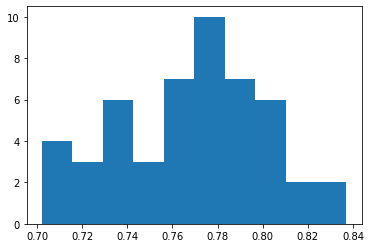

In [58]:
pylab.hist(resultados)

# Analisando os erros

In [59]:
X_valid_check = train.iloc[linhas_valid].copy()
X_valid_check['p'] = p
X_valid_check.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_binario,p
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,1
12,13,0,3,"Saundercock, Mr. William Henry",male,20.0,0,0,A/5. 2151,8.0500,NaN,S,0,0
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C,1,1
22,23,1,3,"McGowan, Miss. Anna ""Annie""",female,15.0,0,0,330923,8.0292,NaN,Q,1,1


In [60]:
erros = X_valid_check[X_valid_check['Survived'] != X_valid_check['p']]
erros.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_binario,p
43,44,1,2,"Laroche, Miss. Simonne Marie Anne Andree",female,3.0,1,2,SC/Paris 2123,41.5792,NaN,C,1,0
49,50,0,3,"Arnold-Franchi, Mrs. Josef (Josefine Franchi)",female,18.0,1,0,349237,17.8000,NaN,S,1,1
125,126,1,3,"Nicola-Yarred, Master. Elias",male,12.0,1,0,2651,11.2417,NaN,C,0,0
182,183,0,3,"Asplund, Master. Clarence Gustaf Hugo",male,9.0,4,2,347077,31.3875,NaN,S,0,1
187,188,1,1,"Romaine, Mr. Charles Hallace (""Mr C Rolmane"")",male,45.0,0,0,111428,26.5500,NaN,S,0,0


# Novas variáveis

In [61]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_binario
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [62]:
train['Embarked_S'] = (train['Embarked'] == 'S').astype(int)
train['Embarked_C'] = (train['Embarked'] == 'C').astype(int)

train['Cabine_nula'] = train['Cabin'].isnull().astype(int)

train['Nome_Miss'] = train['Name'].str.contains("Miss").astype(int)
train['Nome_Mrs'] = train['Name'].str.contains("Mrs").astype(int)

train['Nome_Master'] = train['Name'].str.contains("Master").astype(int)
train['Nome_Col'] = train['Name'].str.contains("Col").astype(int)
train['Nome_Major'] = train['Name'].str.contains("Major").astype(int)
train['Nome_Mr'] = train['Name'].str.contains("Mr").astype(int)

In [63]:
var = ['Sex_binario', 'Age', 'Pclass', 'SibSp', 'Parch', 'Fare', 'Embarked_S', 'Embarked_C', 'Cabine_nula',
             'Nome_Miss', 'Nome_Mrs','Nome_Master', 'Nome_Col', 'Nome_Major', 'Nome_Mr']

In [64]:
X = train[var].fillna(-1)
y = train['Survived']

In [65]:
resultados = []
kf = RepeatedKFold(n_splits=2,n_repeats=10, random_state=10)

for rep in range(10):
    print("Rep:", rep)
    kf = KFold(5, shuffle=True, random_state=rep)

    for linhas_treino, linhas_valid in kf.split(X):
        print("Treino:", linhas_treino.shape[0])
        print("Valid:", linhas_valid.shape[0])

        X_treino, X_valid = X.iloc[linhas_treino], X.iloc[linhas_valid]
        y_treino, y_valid = y.iloc[linhas_treino], y.iloc[linhas_valid]

        modelo = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=0)
        modelo.fit(X_treino, y_treino)

        p = modelo.predict(X_valid)

        acc = np.mean(y_valid == p)
        resultados.append(acc)
        print("Acc:", acc)
        print()

Rep: 0
Treino: 712
Valid: 179
Acc: 0.8212290502793296

Treino: 713
Valid: 178
Acc: 0.797752808988764

Treino: 713
Valid: 178
Acc: 0.8202247191011236

Treino: 713
Valid: 178
Acc: 0.7921348314606742

Treino: 713
Valid: 178
Acc: 0.7921348314606742

Rep: 1
Treino: 712
Valid: 179
Acc: 0.776536312849162

Treino: 713
Valid: 178
Acc: 0.7865168539325843

Treino: 713
Valid: 178
Acc: 0.7865168539325843

Treino: 713
Valid: 178
Acc: 0.8426966292134831

Treino: 713
Valid: 178
Acc: 0.848314606741573

Rep: 2
Treino: 712
Valid: 179
Acc: 0.7988826815642458

Treino: 713
Valid: 178
Acc: 0.8539325842696629

Treino: 713
Valid: 178
Acc: 0.7865168539325843

Treino: 713
Valid: 178
Acc: 0.7865168539325843

Treino: 713
Valid: 178
Acc: 0.7528089887640449

Rep: 3
Treino: 712
Valid: 179
Acc: 0.8044692737430168

Treino: 713
Valid: 178
Acc: 0.7921348314606742

Treino: 713
Valid: 178
Acc: 0.8202247191011236

Treino: 713
Valid: 178
Acc: 0.8146067415730337

Treino: 713
Valid: 178
Acc: 0.7865168539325843

Rep: 4
Treino: 

In [66]:
np.mean(resultados)

0.8113451760718098

(array([4., 2., 8., 8., 6., 7., 8., 5., 1., 1.]),
 array([0.75280899, 0.76573034, 0.77865169, 0.79157303, 0.80449438,
        0.81741573, 0.83033708, 0.84325843, 0.85617978, 0.86910112,
        0.88202247]),
 <BarContainer object of 10 artists>)

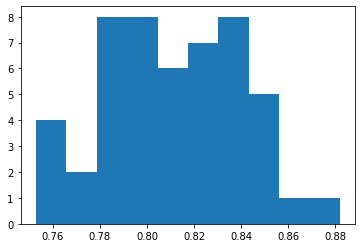

In [67]:
pylab.hist(resultados)

# Usando a regressão logística

In [68]:
from sklearn.linear_model import LogisticRegression

In [69]:
resultados2 = []
kf = RepeatedKFold(n_splits=2, n_repeats=10, random_state=10)

for linhas_treino, linhas_valid in kf.split(X):
    print("Treino:", linhas_treino.shape[0])
    print("Valid:", linhas_valid.shape[0])

    X_treino, X_valid = X.iloc[linhas_treino], X.iloc[linhas_valid]
    y_treino, y_valid = y.iloc[linhas_treino], y.iloc[linhas_valid]

    #modelo = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=0)
    modelo = LogisticRegression()
    
    modelo.fit(X_treino, y_treino)

    p = modelo.predict(X_valid)

    acc = np.mean(y_valid == p)
    resultados2.append(acc)
    print("Acc:", acc)
    print()

Treino: 445
Valid: 446


/home/mateus/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/mateus/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

Acc: 0.8318385650224215

Treino: 446
Valid: 445
Acc: 0.8067415730337079

Treino: 445
Valid: 446
Acc: 0.8116591928251121

Treino: 446
Valid: 445
Acc: 0.802247191011236

Treino: 445
Valid: 446
Acc: 0.8161434977578476

Treino: 446
Valid: 445
Acc: 0.8157303370786517

Treino: 445
Valid: 446
Acc: 0.8183856502242153

Treino: 446
Valid: 445


/home/mateus/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/mateus/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

Acc: 0.8089887640449438

Treino: 445
Valid: 446
Acc: 0.8183856502242153

Treino: 446
Valid: 445
Acc: 0.8179775280898877

Treino: 445
Valid: 446
Acc: 0.8251121076233184

Treino: 446
Valid: 445
Acc: 0.8157303370786517

Treino: 445
Valid: 446


/home/mateus/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/mateus/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

Acc: 0.8408071748878924

Treino: 446
Valid: 445
Acc: 0.8044943820224719

Treino: 445
Valid: 446
Acc: 0.8094170403587444

Treino: 446
Valid: 445
Acc: 0.802247191011236

Treino: 445
Valid: 446
Acc: 0.8363228699551569

Treino: 446
Valid: 445
Acc: 0.8157303370786517

Treino: 445
Valid: 446
Acc: 0.8340807174887892

Treino: 446
Valid: 445
Acc: 0.8269662921348314



/home/mateus/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [70]:
np.mean(resultados2)

0.8179503199475991